# 2 文件IO
## 2.1 矢量文件的读入
## 2.2 矢量文件的写出
### 2.1.1 shapefile
- **完整的shapefile**

In [1]:
import geopandas as gpd

data = gpd.read_file('geometry/china_provinces/china_provinces.shp')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

C:\Program Files\Python37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


epsg:4326


,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


- **缺少投影的shapefile**

In [2]:
data = gpd.read_file('geometry/china_provinces_without_crs/china_provinces.shp')
print(data.crs) # 查看数据对应的crs

None


如果已经知道数据对应的CRS，可以在读入数据后补充上crs信息以进行其他操作：

In [3]:
import pyproj

data.crs = pyproj.CRS.from_user_input('EPSG:4326')
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- **直接读取文件夹**

In [4]:
data = gpd.read_file('geometry\china_provinces')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

epsg:4326


,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


- **读取zip压缩包中的文件**：

In [5]:
data = gpd.read_file('zip://geometry/china_provinces_.zip')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

epsg:4326


,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


### 2.1.2 gdb与gpkg
- **gdb**

In [6]:
data = gpd.read_file('geometry/china_provinces.gdb', 
                     layer='china_provinces')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

epsg:4326


,NAME,Shape_Length,Shape_Area,geometry
0,上海市,5.318338,1.045633,"MULTIPOLYGON (((121.26507 30.69900, 121.26502 ..."
1,云南省,63.186939,34.274694,"MULTIPOLYGON (((99.10984 29.25104, 99.11170 29..."
2,内蒙古自治区,136.955559,128.846038,"MULTIPOLYGON (((106.82306 38.16424, 106.82241 ..."
3,北京市,9.198662,1.731521,"MULTIPOLYGON (((116.45671 40.76884, 116.45995 ..."
4,台湾省,9.967244,3.186530,"MULTIPOLYGON (((121.50042 25.28757, 121.50481 ..."


- **gpkg**

In [7]:
data = gpd.read_file('geometry/china_provinces.gpkg', 
                     layer='china_provinces',
                     encoding='utf-8')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

epsg:4326


,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


### 2.1.3 GeoJSON

In [8]:
data = gpd.read_file('geometry/china_provinces.json')
print(data.crs) # 查看数据对应的crs
data.head() # 查看前5行

epsg:4326


,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


### 2.1.4 过滤
- **bbox过滤**

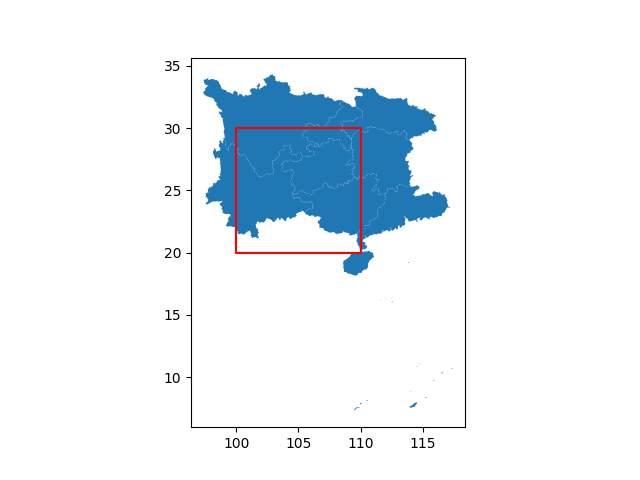

In [9]:
from shapely import geometry

data = gpd.read_file('geometry/china_provinces.json',
                    bbox=(100, 20, 110, 30))

%matplotlib widget
ax = data.plot()
# 绘制bbox框示意
ax = gpd.GeoSeries([geometry.box(minx=100, 
                                 miny=20, 
                                 maxx=110, 
                                 maxy=30).boundary]).plot(ax=ax, color='red')

- **蒙版过滤**

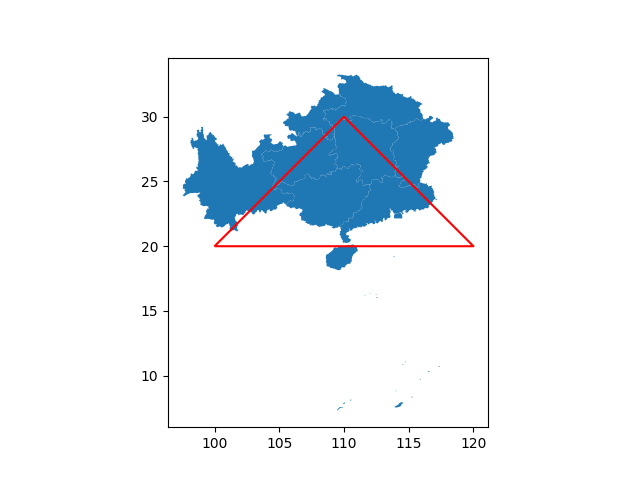

In [10]:
data = gpd.read_file('geometry/china_provinces.json',
                    mask=geometry.Polygon([(100, 20), (110, 30), (120, 20)]))

ax = data.plot()
# 绘制bbox框示意
ax = gpd.GeoSeries([geometry.Polygon([(100, 20), 
                                      (110, 30), 
                                      (120, 20)]).boundary]).plot(ax=ax, color='red')

- **行过滤**

In [11]:
data = gpd.read_file('geometry/china_provinces.json',
                    rows=5) # 读取前5行
data

,NAME,geometry
0,上海市,"POLYGON ((121.26507 30.69900, 121.26502 30.699..."
1,云南省,"POLYGON ((99.10984 29.25104, 99.11170 29.24993..."
2,内蒙古自治区,"POLYGON ((106.82306 38.16423, 106.82241 38.164..."
3,北京市,"POLYGON ((116.45671 40.76884, 116.45995 40.770..."
4,台湾省,"POLYGON ((121.50042 25.28757, 121.50481 25.287..."


## 2.2 矢量文件的写出
- **ESRI Shapefile**

In [ ]:
'''在工程根目录下创建output文件夹'''
import os

try:
    os.mkdir('output')
except FileExistsError:
    pass
    
data.to_file('output/output.shp', 
             driver='ESRI Shapefile',
             encoding='utf-8')

In [ ]:
data.to_file('output/output_shapefile', 
             driver='ESRI Shapefile',
             encoding='utf-8')

In [ ]:
data.to_file('output/output_shapefile_multi_layer', 
             driver='ESRI Shapefile',
             layer='layer1',
             encoding='utf-8')

data.to_file('output/output_shapefile_multi_layer', 
             driver='ESRI Shapefile',
             layer='layer2',
             encoding='utf-8')

data.to_file('output/output_shapefile_multi_layer', 
             driver='ESRI Shapefile',
             layer='layer3',
             encoding='utf-8')

- **GeoPackage**

In [ ]:
data.to_file('output/output.gpkg',
        driver='GPKG',
        layer='layer1',
        encoding='utf-8')

gpd.read_file('output/output.gpkg',
             layer='layer1')

- **GeoJSON**

In [ ]:
data.to_file('output/output.json',
            driver='GeoJSON',
            encoding='utf-8')

gpd.read_file('output/output.json')